<a href="https://colab.research.google.com/github/Shirsendu1260/ai-notebooks/blob/main/single_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# For rendering images using 'matplotlib'
%matplotlib inline

In [2]:
# Load MNIST dataset and directly perform train test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len_x_train = len(x_train)
len_x_test = len(x_test)
(len_x_train, len_x_test)

(60000, 10000)

In [4]:
# Select any one image from training feature dataset (x_train)
# Here we choose 10th image
img = x_train[9]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 136, 247, 242,  86,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 192, 252, 187,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62,
        185,  18,   0,   0,   0,   0,  89, 236, 217,  47,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 216,
        253,  60,   0,   0,   0,   0, 212, 255,  81,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 206,
        252,  68,   0,   0,   0,  48, 242, 253,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 251,
        212,  21,   0,   0,  11, 167, 252, 197,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 232, 247,
         63,   0,   0,   0, 153, 252, 226,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 219, 252, 143,
          0,   0,   0, 116, 249, 252, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,  96, 253, 255, 253, 200,
        122,   7,  25, 201, 250, 158,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  92, 252, 252, 253, 217, 252,
        252, 200, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  87, 251, 247, 231,  65,  48, 189,
        252, 252, 253, 252, 251, 227,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 190, 221,  98,   0,   0,   0,  42,
        196, 252, 253, 252, 252, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 111,  29,   0,   0,   0,   0,  62,
        239, 252,  86,  42,  42,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 148,
        253, 218,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 252,
        231,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 221, 251,
        129,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 218, 252, 160,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 122, 252,  82,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [5]:
img.shape

(28, 28)

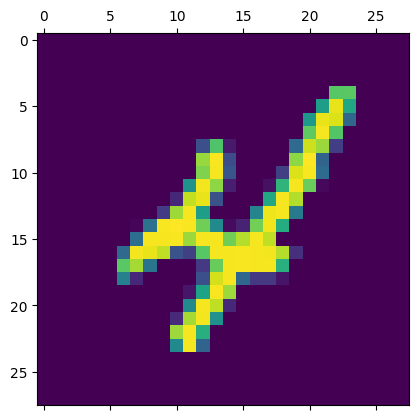

In [6]:
# Show image
plt.matshow(img)

In [7]:
# Before normalizing that same image
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 136, 247, 242,  86,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 192, 252, 187,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62,
        185,  18,   0,   0,   0,   0,  89, 236, 217,  47,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 216,
        253,  60,   0,   0,   0,   0, 212, 255,  81,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 206,
        252,  68,   0,   0,   0,  48, 242, 253,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 251,
        212,  21,   0,   0,  11, 167, 252, 197,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 232, 247,
         63,   0,   0,   0, 153, 252, 226,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 219, 252, 143,
          0,   0,   0, 116, 249, 252, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,  96, 253, 255, 253, 200,
        122,   7,  25, 201, 250, 158,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  92, 252, 252, 253, 217, 252,
        252, 200, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  87, 251, 247, 231,  65,  48, 189,
        252, 252, 253, 252, 251, 227,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 190, 221,  98,   0,   0,   0,  42,
        196, 252, 253, 252, 252, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 111,  29,   0,   0,   0,   0,  62,
        239, 252,  86,  42,  42,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 148,
        253, 218,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 252,
        231,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 221, 251,
        129,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 218, 252, 160,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 122, 252,  82,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [8]:
# Normalize the training feature datasets
x_train = x_train / 255
x_test = x_test / 255

In [9]:
# After normalizing that same image
x_train[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Flatten the dataset in order to compute for model building
x_train_flatten = x_train.reshape(len_x_train, 28*28)
x_test_flatten = x_test.reshape(len_x_test, 28*28)

In [12]:
x_train_flatten[0].shape, x_test_flatten[0].shape

((784,), (784,))

In [14]:
# Model selection
model = keras.Sequential([
keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

In [15]:
# Model implementation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [17]:
model.fit(x_train_flatten, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4685 - accuracy: 0.8776
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2670 - accuracy: 0.9254
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9269
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9286
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9291
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9300
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251